#Develop Super Learner Ensembles in Python

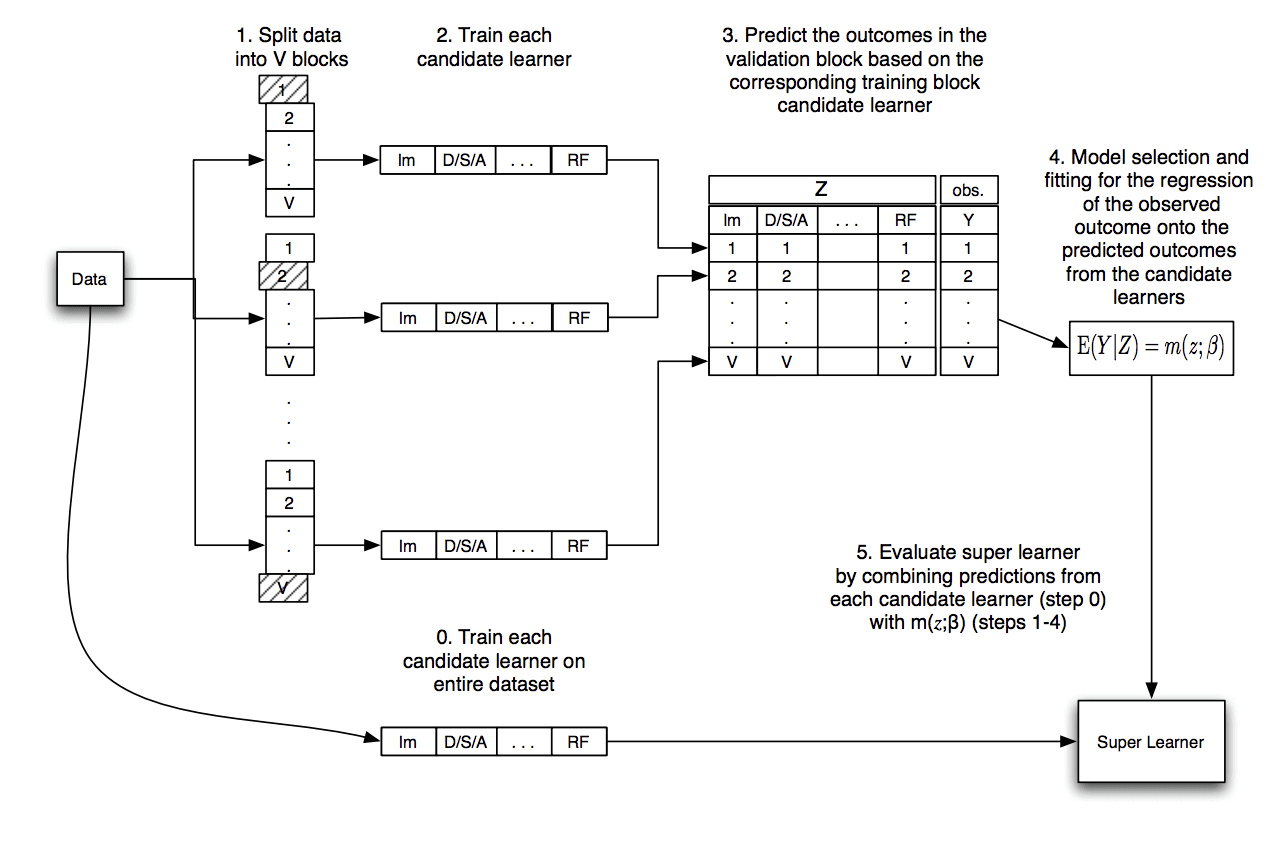

##Super Learner for Regression

In [ ]:
# example of a super learner model for regression
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# create a list of base-models
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(ElasticNet())
	models.append(SVR(gamma='scale'))
	models.append(DecisionTreeRegressor())
	models.append(KNeighborsRegressor())
	models.append(AdaBoostRegressor())
	models.append(BaggingRegressor(n_estimators=10))
	models.append(RandomForestRegressor(n_estimators=10))
	models.append(ExtraTreesRegressor(n_estimators=10))
	return models



# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
    
		meta_y.extend(test_y)
  
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict(test_X)
			# store columns
			fold_yhats.append(yhat.reshape(len(yhat),1))
   
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)



# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)



# fit a meta model
def fit_meta_model(X, y):
	model = LinearRegression()
	model.fit(X, y)
	return model



# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))



# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict(X)
		meta_X.append(yhat.reshape(len(yhat),1))
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)



# create the inputs and outputs
X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)

# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)

print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)

# get models
models = get_models()

# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)

print('Meta ', meta_X.shape, meta_y.shape)

# fit base models
fit_base_models(X, y, models)

# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

# evaluate base models
evaluate_models(X_val, y_val, models)

# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_val, yhat))))

Train (500, 100) (500,) Test (500, 100) (500,)
Meta  (500, 9) (500,)
LinearRegression: RMSE 0.538
ElasticNet: RMSE 67.902
SVR: RMSE 177.132
DecisionTreeRegressor: RMSE 165.469
KNeighborsRegressor: RMSE 154.416
AdaBoostRegressor: RMSE 97.461
BaggingRegressor: RMSE 113.763
RandomForestRegressor: RMSE 114.433
ExtraTreesRegressor: RMSE 108.498
Super Learner: RMSE 0.548


##Super Learner for Classification

In [ ]:
# example of a super learner model for binary classification
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	return models



# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)



# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)



# fit a meta model
def fit_meta_model(X, y):
	model = LogisticRegression(solver='liblinear')
	model.fit(X, y)
	return model



# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100))


# Generate [x_test] for [meta_model] should be this size  (500, 18)(meta_X) then predict in the [return] line
# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)



# create the inputs and outputs
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)


# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)


# get models
models = get_models()



# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)



# fit base models
fit_base_models(X, y, models)



# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)



# evaluate base models
evaluate_models(X_val, y_val, models)

# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)

print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

Train (500, 100) (500,) Test (500, 100) (500,)
Meta  (500, 18) (500,)
LogisticRegression: 95.400
DecisionTreeClassifier: 72.600
SVC: 97.000
GaussianNB: 96.800
KNeighborsClassifier: 94.400
AdaBoostClassifier: 93.600
BaggingClassifier: 83.400
RandomForestClassifier: 82.600
ExtraTreesClassifier: 86.200
Super Learner: 97.000


##Super Learner for Regression With the ML-Ensemble Library

In [ ]:
# example of a super learner for regression using the mlens library
from math import sqrt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from mlens.ensemble import SuperLearner

# create a list of base-models
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(ElasticNet())
	models.append(SVR(gamma='scale'))
	models.append(DecisionTreeRegressor())
	models.append(KNeighborsRegressor())
	models.append(AdaBoostRegressor())
	models.append(BaggingRegressor(n_estimators=10))
	models.append(RandomForestRegressor(n_estimators=10))
	models.append(ExtraTreesRegressor(n_estimators=10))
	return models



# cost function for base models
def rmse(yreal, yhat):
	return sqrt(mean_squared_error(yreal, yhat))



# create the super learner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=rmse, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LinearRegression())
	return ensemble



# create the inputs and outputs
X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)



# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)



# create the super learner
ensemble = get_super_learner(X)



# fit the super learner
ensemble.fit(X, y)



# summarize base learners
print(ensemble.data)



# evaluate meta model
yhat = ensemble.predict(X_val)
print('Super Learner: RMSE %.3f' % (rmse(y_val, yhat)))

[MLENS] backend: threading


Train (500, 100) (500,) Test (500, 100) (500,)
                                  score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor         125.84    16.61  1.64  0.14  0.01  0.00
layer-1  baggingregressor          140.69    14.49  0.62  0.08  0.01  0.00
layer-1  decisiontreeregressor     207.66    20.12  0.11  0.03  0.00  0.00
layer-1  elasticnet                 78.82    12.49  0.01  0.01  0.00  0.01
layer-1  extratreesregressor       143.22    16.22  0.29  0.07  0.01  0.00
layer-1  kneighborsregressor       194.59    18.76  0.00  0.00  0.01  0.00
layer-1  linearregression            0.57     0.03  0.04  0.01  0.00  0.00
layer-1  randomforestregressor     144.78    17.14  0.59  0.08  0.00  0.00
layer-1  svr                       211.40    26.65  0.05  0.02  0.01  0.01

Super Learner: RMSE 0.542


##Super Learner for Classification With the ML-Ensemble Library

In [ ]:
# example of a super learner using the mlens library
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlens.ensemble import SuperLearner

# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	return models

# create the super learner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LogisticRegression(solver='lbfgs'))
	return ensemble

# create the inputs and outputs
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# create the super learner
ensemble = get_super_learner(X)
# fit the super learner
ensemble.fit(X, y)
# summarize base learners
print(ensemble.data)
# make predictions on hold out set
yhat = ensemble.predict(X_val)
print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

Train (500, 100) (500,) Test (500, 100) (500,)
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.93     0.02  0.77  0.19  0.03  0.01
layer-1  baggingclassifier            0.83     0.05  0.43  0.06  0.00  0.00
layer-1  decisiontreeclassifier       0.70     0.06  0.07  0.01  0.00  0.00
layer-1  extratreesclassifier         0.83     0.04  0.06  0.00  0.01  0.00
layer-1  gaussiannb                   0.98     0.02  0.00  0.00  0.00  0.00
layer-1  kneighborsclassifier         0.93     0.03  0.00  0.00  0.01  0.00
layer-1  logisticregression           0.97     0.02  0.03  0.00  0.00  0.00
layer-1  randomforestclassifier       0.84     0.05  0.08  0.01  0.00  0.00
layer-1  svc                          0.98     0.02  0.11  0.01  0.00  0.00

Super Learner: 98.200
